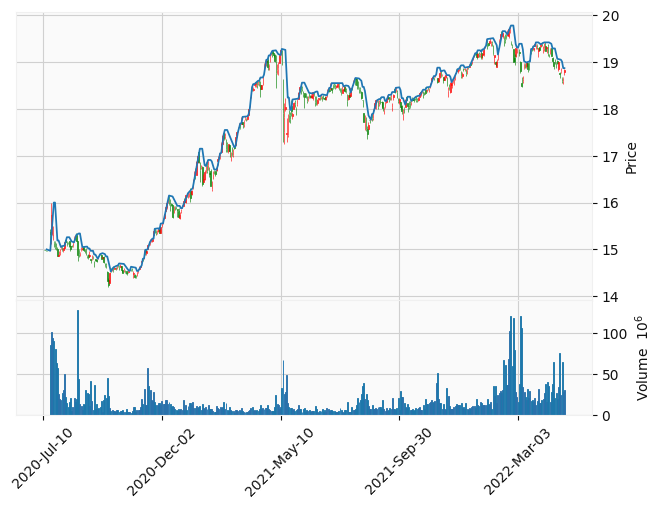

In [2]:
# 載入必要套件
from Data import getDataFM
from BackTest import ChartTrade
import mplfinance as mpf

# 取得回測資料
prod = "00878"
data = getDataFM(prod, "2007-01-01", "2022-05-01")

# 計算前N根K最高價
data["ceil"] = data.rolling(3)["high"].max().shift()

# 繪製副圖
addp = []
addp.append(mpf.make_addplot(data["ceil"]))

# 繪製K線圖與交易明細
ChartTrade(data, addp=addp)